In [2]:
# Importation des données
import pandas as pd

# Lecture des données
donnees=pd.read_excel(r'Bases de données/DonneSante.xlsx')

In [3]:
donnees

,Unnamed: 0.2,Arthrose,age,taux_de_cholesterol,taux_de_glycemie,Medicament,pression_arterielle,Unnamed: 0,Sexe,Medicament_code,Arthrose_code,Unnamed: 0.1,Sexe.1
0,0,oui,52,165,73,Rosuvastatine,175,0,0,0,0,0,Masculin
1,1,oui,39,228,104,Simvastatine,132,1,1,1,0,1,Masculin
2,2,non,69,229,86,Rosuvastatine,125,2,0,0,1,2,Feminin
3,3,oui,70,161,107,Rosuvastatine,99,3,1,0,0,3,Masculin
4,4,non,43,289,136,Rosuvastatine,112,4,0,0,1,4,Feminin
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,non,65,219,121,Doliprane,115,95,0,2,1,95,Feminin
96,96,oui,69,260,133,Rosuvastatine,179,96,1,0,0,96,Feminin
97,97,oui,79,214,95,Simvastatine,161,97,1,1,0,97,Masculin
98,98,oui,86,270,130,Rosuvastatine,140,98,0,0,0,98,Masculin


In [5]:
donnees.isnull().sum()

Unnamed: 0.2           0
Arthrose               0
age                    0
taux_de_cholesterol    0
taux_de_glycemie       0
Medicament             0
pression_arterielle    0
Unnamed: 0             0
Sexe                   0
Medicament_code        0
Arthrose_code          0
Unnamed: 0.1           0
Sexe.1                 0
dtype: int64

In [6]:
donnees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0.2         100 non-null    int64 
 1   Arthrose             100 non-null    object
 2   age                  100 non-null    int64 
 3   taux_de_cholesterol  100 non-null    int64 
 4   taux_de_glycemie     100 non-null    int64 
 5   Medicament           100 non-null    object
 6   pression_arterielle  100 non-null    int64 
 7   Unnamed: 0           100 non-null    int64 
 8   Sexe                 100 non-null    int64 
 9   Medicament_code      100 non-null    int64 
 10  Arthrose_code        100 non-null    int64 
 11  Unnamed: 0.1         100 non-null    int64 
 12  Sexe.1               100 non-null    object
dtypes: int64(10), object(3)
memory usage: 10.3+ KB


In [12]:
stats=donnees.select_dtypes(exclude=['object']).drop(columns=['Unnamed: 0.2','Unnamed: 0','Unnamed: 0.1']).describe()

In [13]:
stats

,age,taux_de_cholesterol,taux_de_glycemie,pression_arterielle,Sexe,Medicament_code,Arthrose_code
count,100.000000,100.000000,100.000000,100.000000,100.00,100.000000,100.000000
mean,56.100000,227.600000,111.790000,131.870000,0.55,1.090000,0.480000
std,20.637076,44.599678,20.131033,25.040837,0.50,0.842015,0.502117
min,20.000000,150.000000,72.000000,90.000000,0.00,0.000000,0.000000
25%,37.750000,186.250000,95.000000,111.500000,0.00,0.000000,0.000000
50%,57.000000,229.000000,114.000000,130.000000,1.00,1.000000,0.000000
75%,74.000000,269.250000,127.000000,154.000000,1.00,2.000000,1.000000
max,90.000000,299.000000,150.000000,179.000000,1.00,2.000000,1.000000


In [17]:
dataheath = donnees.select_dtypes(exclude=['object']).drop(columns=['Unnamed: 0.2','Unnamed: 0','Unnamed: 0.1'])
dataheath

,age,taux_de_cholesterol,taux_de_glycemie,pression_arterielle,Sexe,Medicament_code,Arthrose_code
0,52,165,73,175,0,0,0
1,39,228,104,132,1,1,0
2,69,229,86,125,0,0,1
3,70,161,107,99,1,0,0
4,43,289,136,112,0,0,1
...,...,...,...,...,...,...,...
95,65,219,121,115,0,2,1
96,69,260,133,179,1,0,0
97,79,214,95,161,1,1,0
98,86,270,130,140,0,0,0


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [27]:
# Supposons que 'dataheath' soit un DataFrame pandas déjà chargé

# Sélection des variables
y = dataheath['Sexe']  # Variable cible
x = dataheath[['age', 'taux_de_cholesterol', 'taux_de_glycemie', 'pression_arterielle', 'Medicament_code', 'Arthrose_code']]

# Division des données en ensemble d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=808)

# Entraînement du modèle
modele = LogisticRegression()
modele.fit(x_train, y_train)  # Correction : Inverser les arguments y_train et x_train

# Prédiction
y_pred = modele.predict(x_test)

# Évaluation de la performance prédictive
conf_matrix = confusion_matrix(y_test, y_pred)
report_class = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)


In [30]:
print("\nRapport de classification :\n", report_class)


Rapport de classification :
               precision    recall  f1-score   support

           0       0.88      0.54      0.67        13
           1       0.50      0.86      0.63         7

    accuracy                           0.65        20
   macro avg       0.69      0.70      0.65        20
weighted avg       0.74      0.65      0.65        20



In [31]:
print("Matrice de confusion :\n", conf_matrix)
print("\nExactitude :\n", accuracy)

Matrice de confusion :
 [[7 6]
 [1 6]]

Exactitude :
 0.65


In [33]:
import missingno as msg

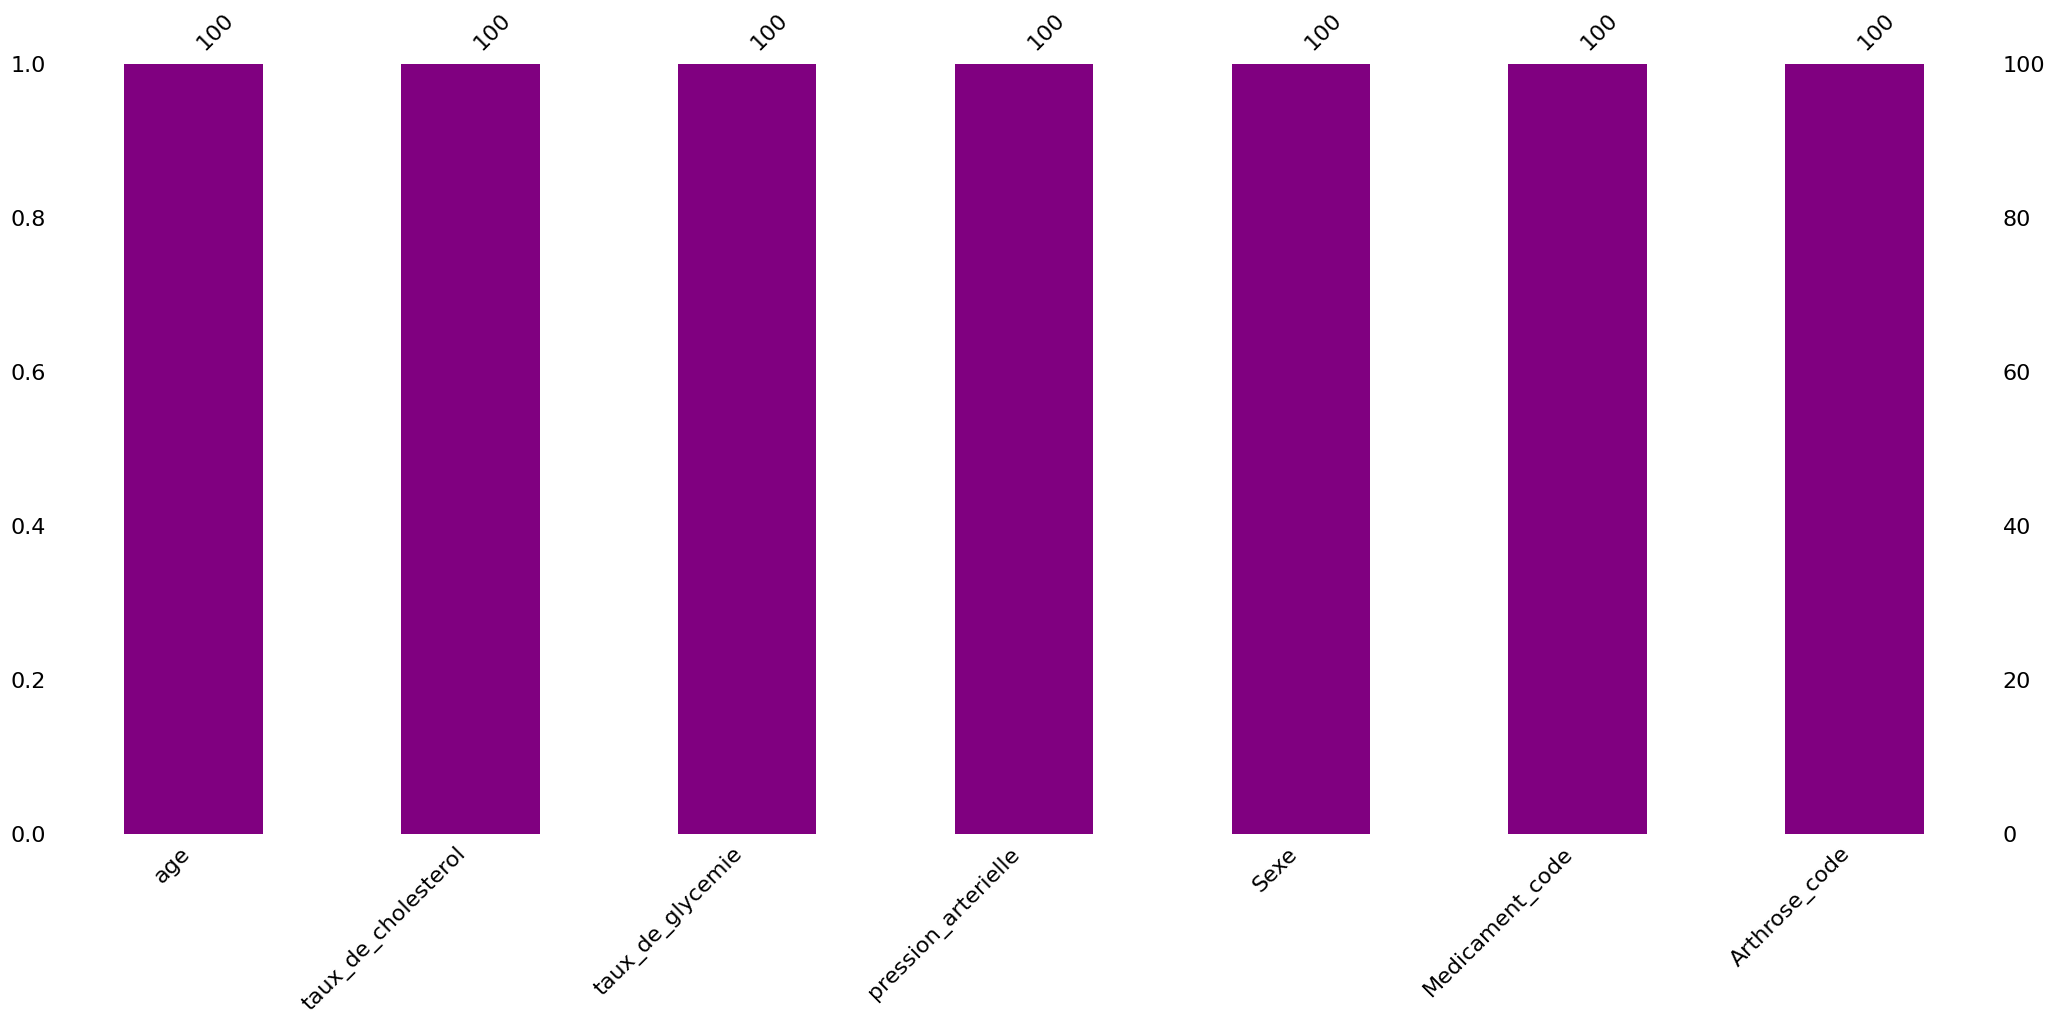

In [35]:
msg.bar(dataheath, color='purple')
plt.show()

<Axes: >

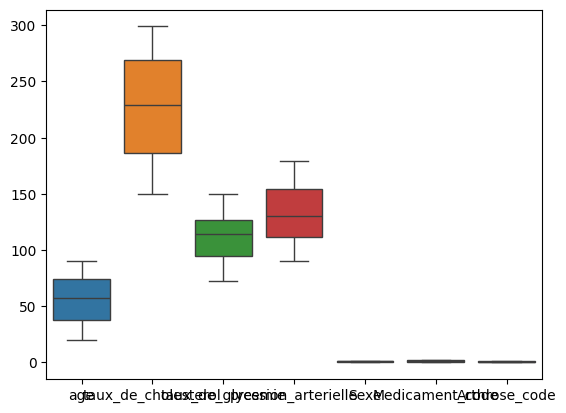

In [37]:
sns.boxplot(data=dataheath)

In [40]:
dataheath.Sexe.value_counts()

Sexe
1    55
0    45
Name: count, dtype: int64

In [41]:
dataheath.age.value_counts()

age
31    5
52    4
65    4
69    4
72    4
37    4
86    3
62    3
78    3
25    3
75    3
50    3
70    3
89    2
45    2
21    2
59    2
23    2
80    2
74    2
39    2
48    2
27    2
43    2
57    2
51    2
76    2
79    1
35    1
71    1
38    1
32    1
42    1
24    1
63    1
90    1
85    1
44    1
83    1
66    1
41    1
87    1
34    1
56    1
55    1
47    1
77    1
20    1
29    1
88    1
22    1
81    1
84    1
Name: count, dtype: int64

In [42]:
donnees

,Unnamed: 0.2,Arthrose,age,taux_de_cholesterol,taux_de_glycemie,Medicament,pression_arterielle,Unnamed: 0,Sexe,Medicament_code,Arthrose_code,Unnamed: 0.1,Sexe.1
0,0,oui,52,165,73,Rosuvastatine,175,0,0,0,0,0,Masculin
1,1,oui,39,228,104,Simvastatine,132,1,1,1,0,1,Masculin
2,2,non,69,229,86,Rosuvastatine,125,2,0,0,1,2,Feminin
3,3,oui,70,161,107,Rosuvastatine,99,3,1,0,0,3,Masculin
4,4,non,43,289,136,Rosuvastatine,112,4,0,0,1,4,Feminin
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,non,65,219,121,Doliprane,115,95,0,2,1,95,Feminin
96,96,oui,69,260,133,Rosuvastatine,179,96,1,0,0,96,Feminin
97,97,oui,79,214,95,Simvastatine,161,97,1,1,0,97,Masculin
98,98,oui,86,270,130,Rosuvastatine,140,98,0,0,0,98,Masculin


In [44]:
donnees['Sexe.1'].value_counts()

Sexe.1
Masculin    54
Feminin     46
Name: count, dtype: int64

In [46]:
donnees['Sexe.1'].map({'masculin':0, 'feminin':1})

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
95   NaN
96   NaN
97   NaN
98   NaN
99   NaN
Name: Sexe.1, Length: 100, dtype: float64

<Axes: >

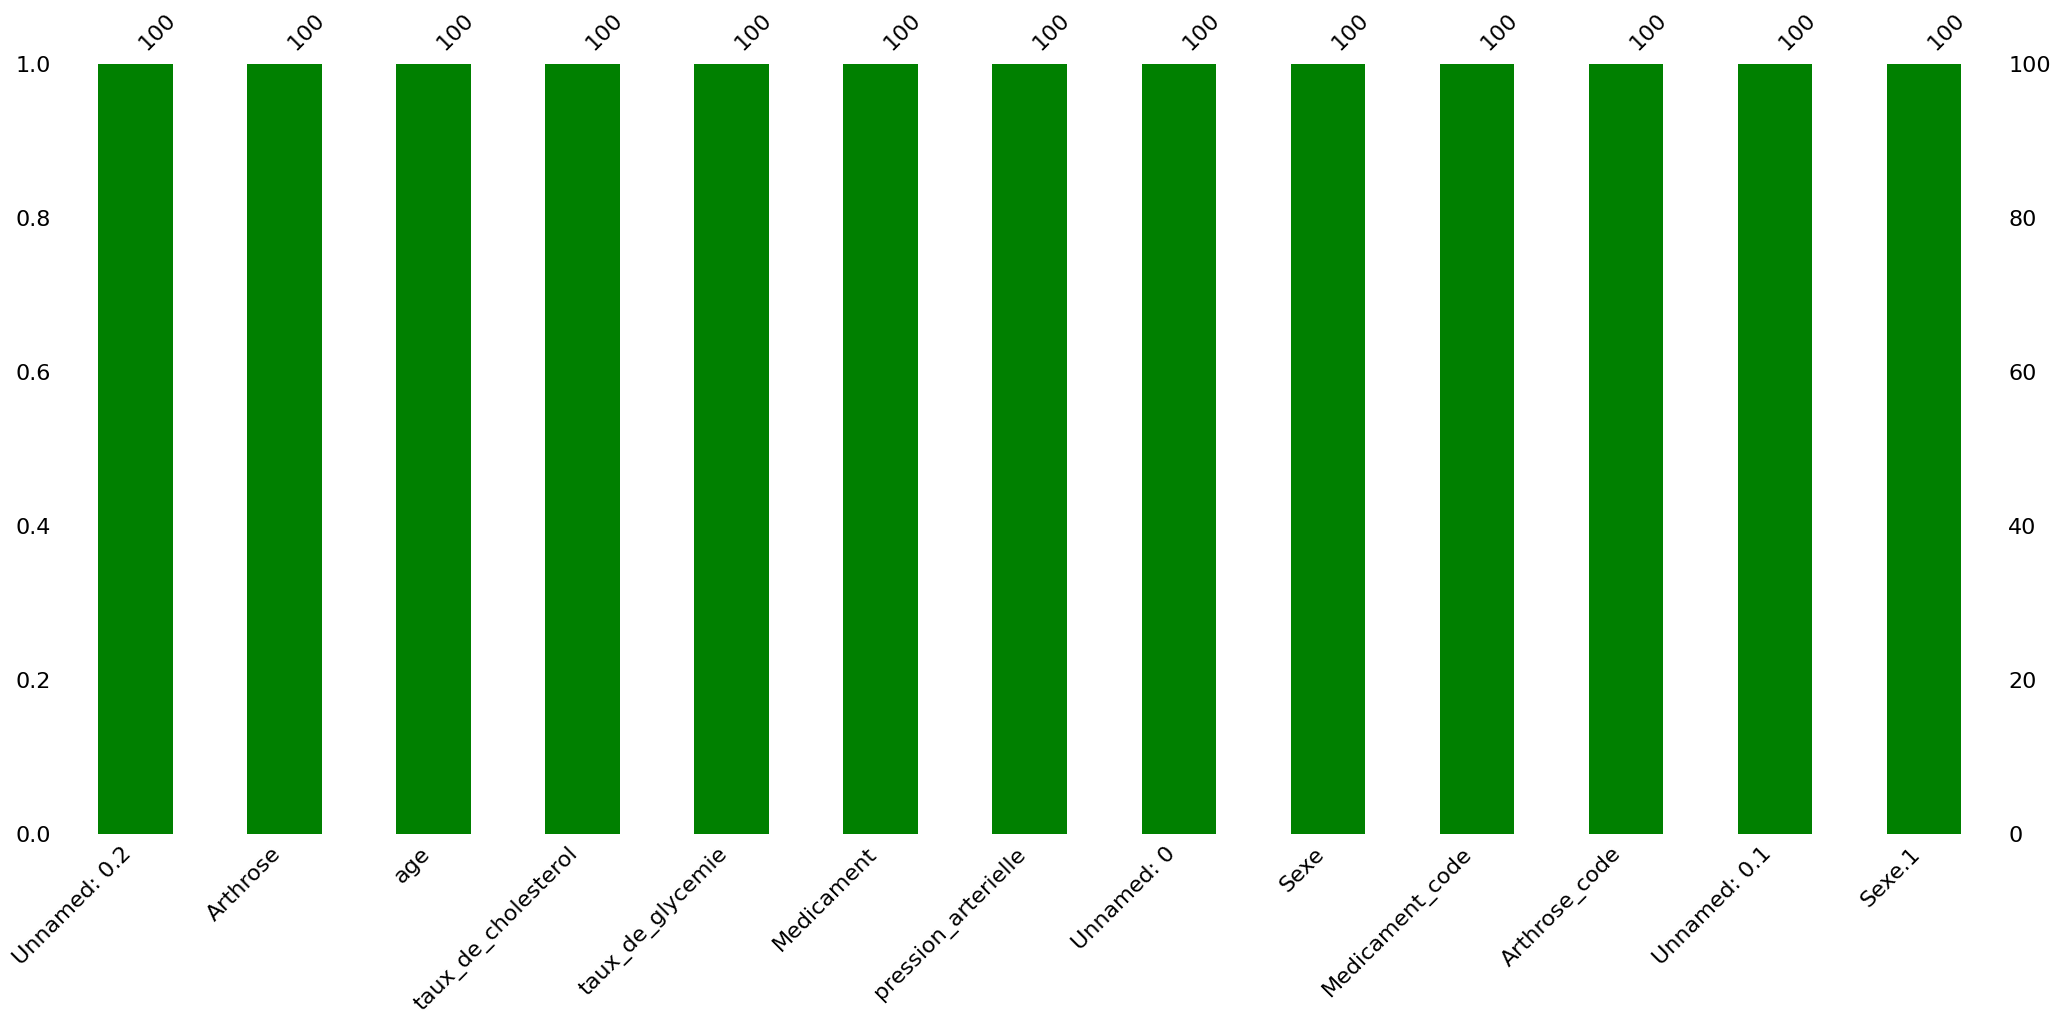

In [47]:
msg.bar(donnees, color='green')

In [48]:
donnees['Sexe.1'].isna().sum()

0

In [49]:
donnees

,Unnamed: 0.2,Arthrose,age,taux_de_cholesterol,taux_de_glycemie,Medicament,pression_arterielle,Unnamed: 0,Sexe,Medicament_code,Arthrose_code,Unnamed: 0.1,Sexe.1
0,0,oui,52,165,73,Rosuvastatine,175,0,0,0,0,0,Masculin
1,1,oui,39,228,104,Simvastatine,132,1,1,1,0,1,Masculin
2,2,non,69,229,86,Rosuvastatine,125,2,0,0,1,2,Feminin
3,3,oui,70,161,107,Rosuvastatine,99,3,1,0,0,3,Masculin
4,4,non,43,289,136,Rosuvastatine,112,4,0,0,1,4,Feminin
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,non,65,219,121,Doliprane,115,95,0,2,1,95,Feminin
96,96,oui,69,260,133,Rosuvastatine,179,96,1,0,0,96,Feminin
97,97,oui,79,214,95,Simvastatine,161,97,1,1,0,97,Masculin
98,98,oui,86,270,130,Rosuvastatine,140,98,0,0,0,98,Masculin


In [55]:
encoded=pd.get_dummies(donnees.Medicament)

In [56]:
encoded

,Doliprane,Rosuvastatine,Simvastatine
0,False,True,False
1,False,False,True
2,False,True,False
3,False,True,False
4,False,True,False
...,...,...,...
95,True,False,False
96,False,True,False
97,False,False,True
98,False,True,False


In [57]:
encoded.value_counts()

Doliprane  Rosuvastatine  Simvastatine
True       False          False           40
False      True           False           31
           False          True            29
Name: count, dtype: int64

In [65]:
donnees.loc[donnees['Sexe.1'] == 'NON', 'sex'] = 0
donnees.loc[donnees['Sexe.1'] == 'OUI', 'sex'] = 1

<Axes: >

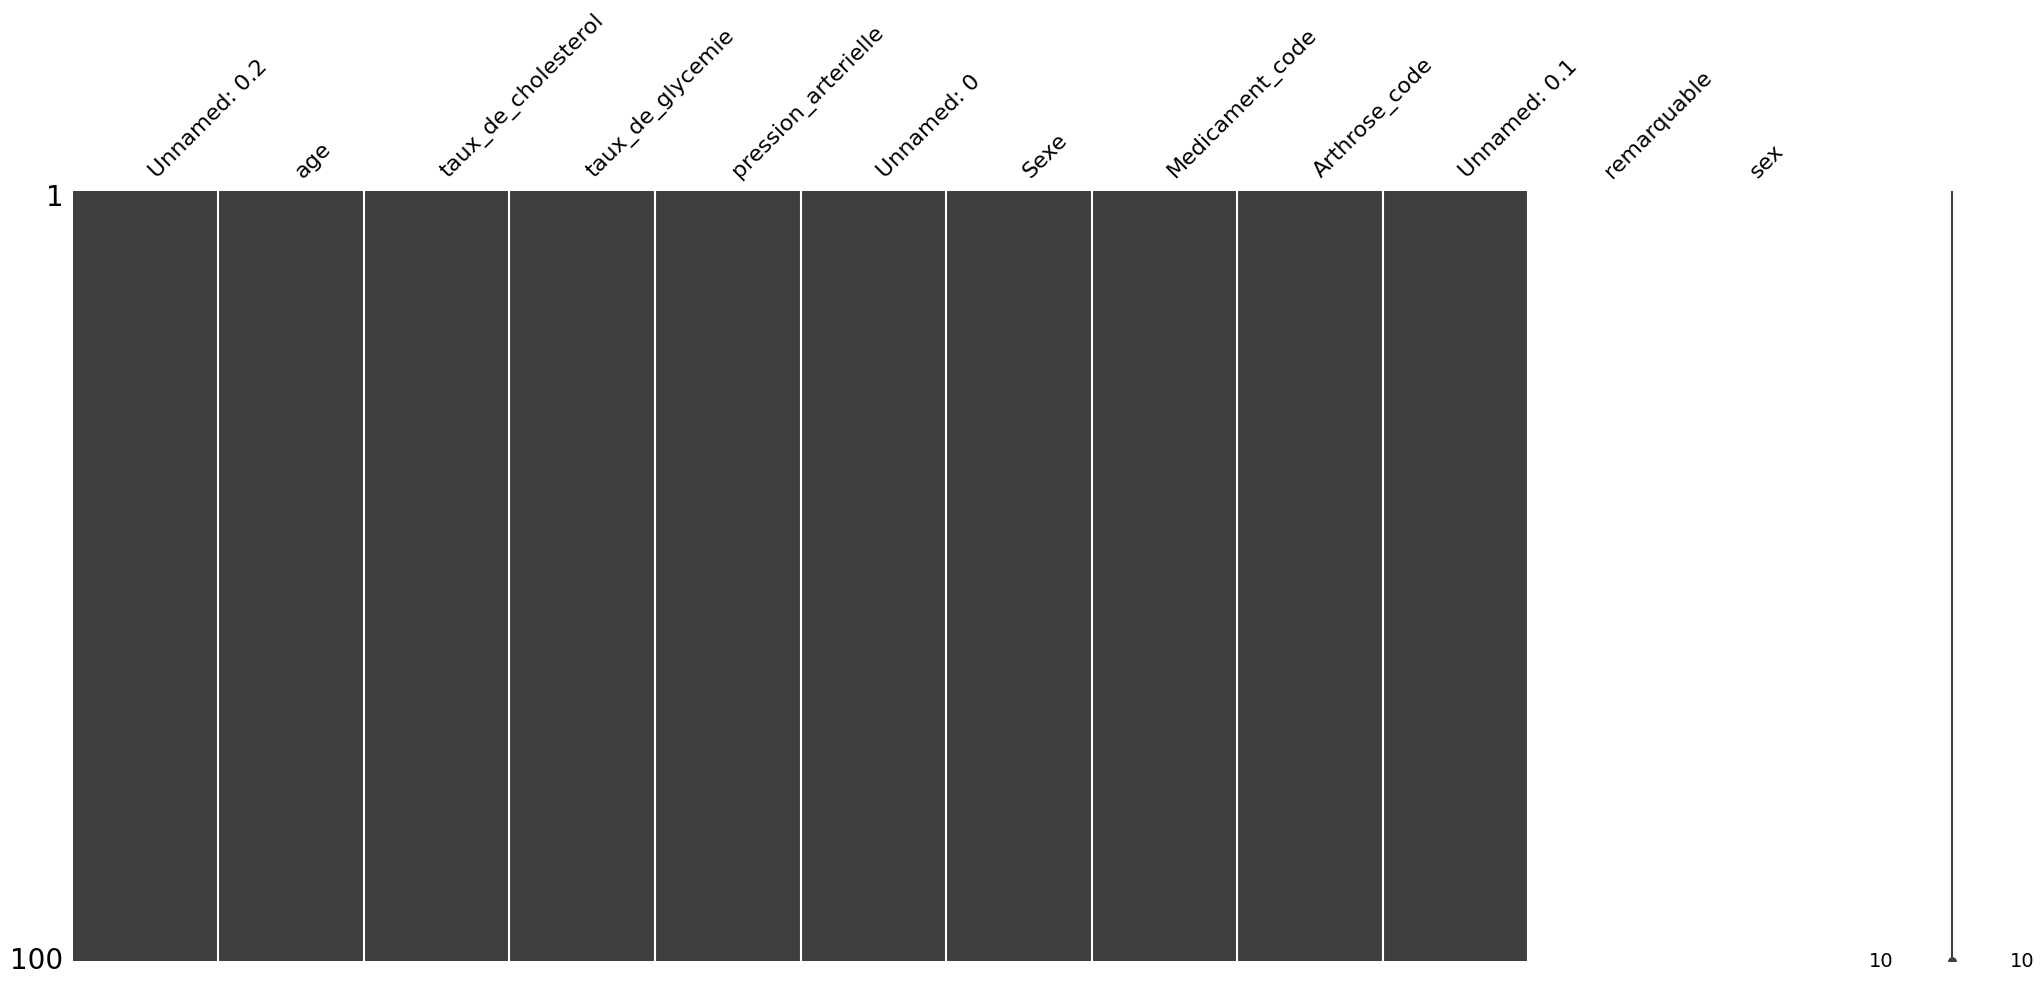

In [66]:
msg.matrix(donnees.select_dtypes(exclude=['object']))

<Axes: >

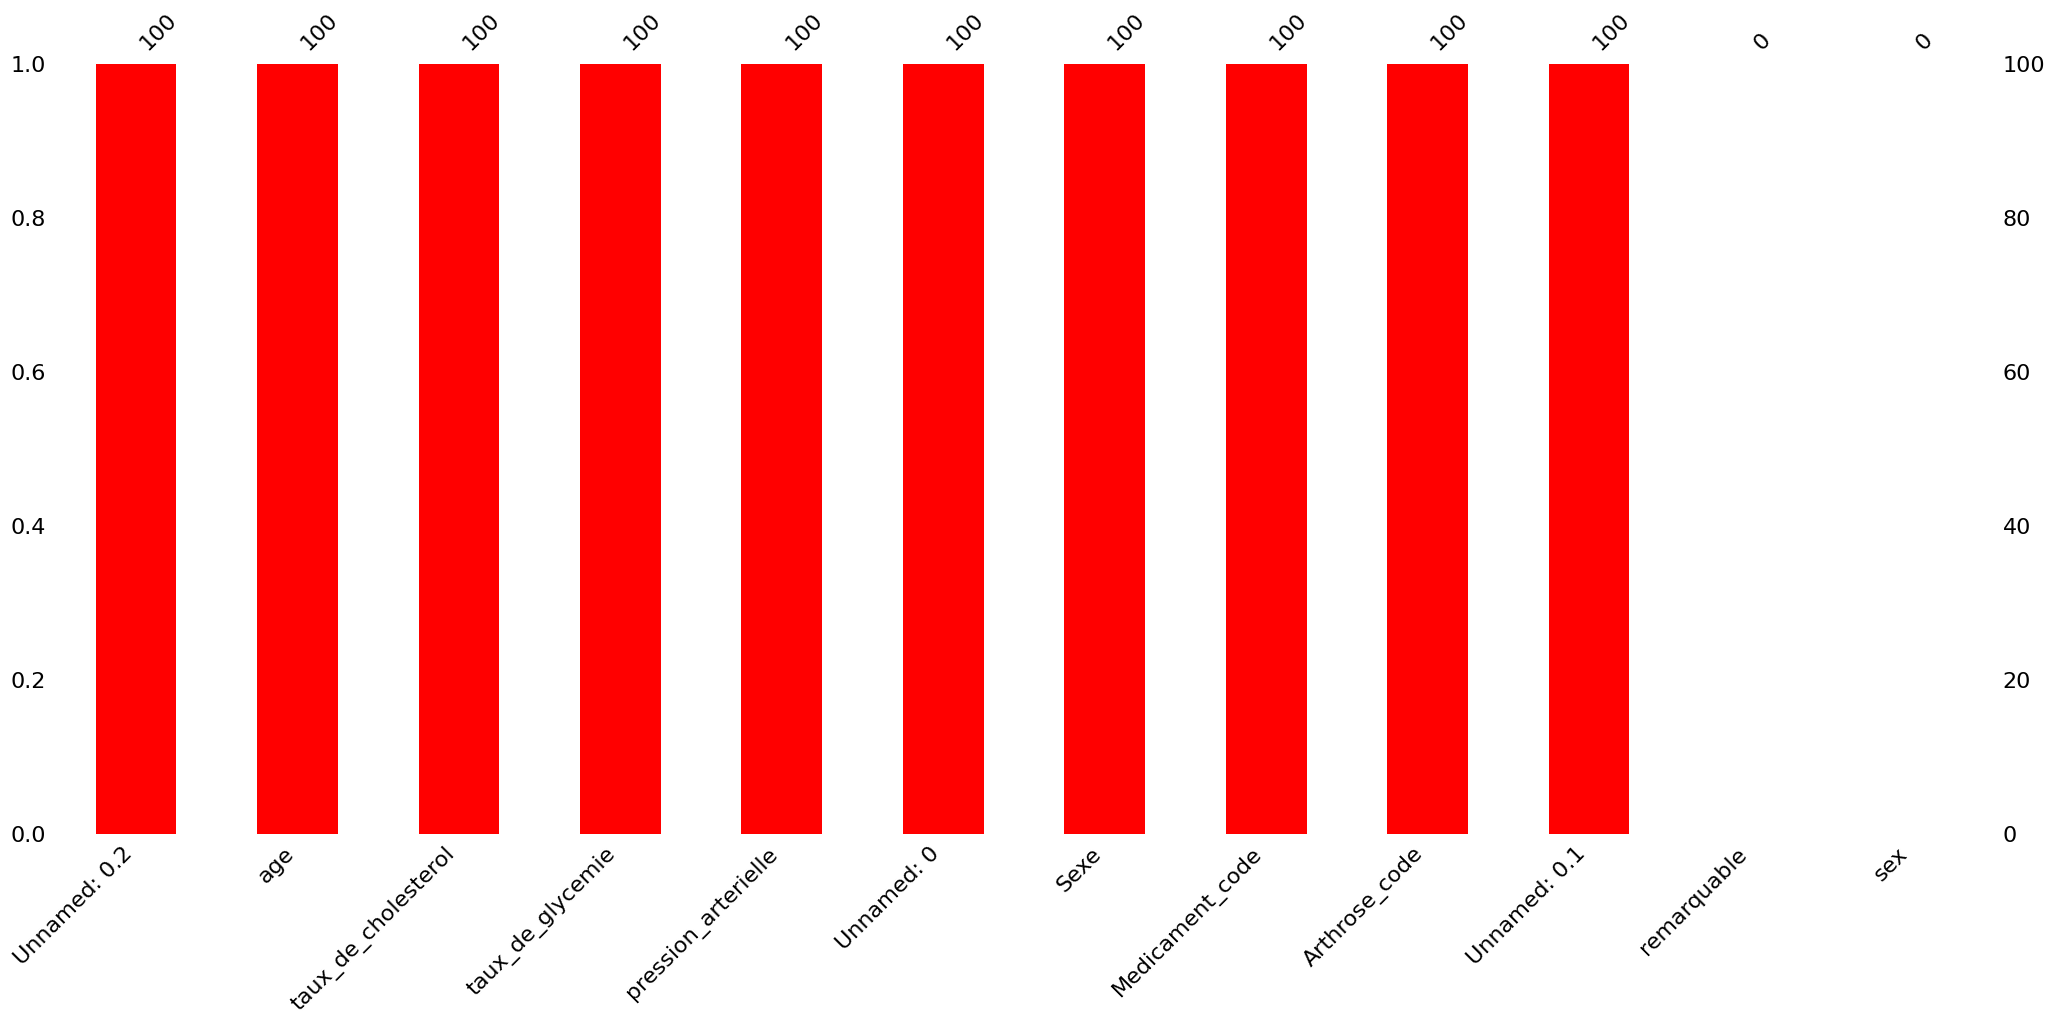

In [68]:
msg.bar(donnees.select_dtypes(exclude=['object']), color='red')

In [69]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df

In [72]:
donnees

,Unnamed: 0.2,Arthrose,age,taux_de_cholesterol,taux_de_glycemie,Medicament,pression_arterielle,Unnamed: 0,Sexe,Medicament_code,Arthrose_code,Unnamed: 0.1,Sexe.1,remarquable,sex
0,0,oui,52,165,73,Rosuvastatine,175,0,0,0,0,0,Masculin,NaN,NaN
1,1,oui,39,228,104,Simvastatine,132,1,1,1,0,1,Masculin,NaN,NaN
2,2,non,69,229,86,Rosuvastatine,125,2,0,0,1,2,Feminin,NaN,NaN
3,3,oui,70,161,107,Rosuvastatine,99,3,1,0,0,3,Masculin,NaN,NaN
4,4,non,43,289,136,Rosuvastatine,112,4,0,0,1,4,Feminin,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,non,65,219,121,Doliprane,115,95,0,2,1,95,Feminin,NaN,NaN
96,96,oui,69,260,133,Rosuvastatine,179,96,1,0,0,96,Feminin,NaN,NaN
97,97,oui,79,214,95,Simvastatine,161,97,1,1,0,97,Masculin,NaN,NaN
98,98,oui,86,270,130,Rosuvastatine,140,98,0,0,0,98,Masculin,NaN,NaN


In [77]:
donne= donnees.drop(columns=['Unnamed: 0.2','Unnamed: 0','Unnamed: 0.1','remarquable','sex'])

In [78]:
donne

,Arthrose,age,taux_de_cholesterol,taux_de_glycemie,Medicament,pression_arterielle,Sexe,Medicament_code,Arthrose_code,Sexe.1
0,oui,52,165,73,Rosuvastatine,175,0,0,0,Masculin
1,oui,39,228,104,Simvastatine,132,1,1,0,Masculin
2,non,69,229,86,Rosuvastatine,125,0,0,1,Feminin
3,oui,70,161,107,Rosuvastatine,99,1,0,0,Masculin
4,non,43,289,136,Rosuvastatine,112,0,0,1,Feminin
...,...,...,...,...,...,...,...,...,...,...
95,non,65,219,121,Doliprane,115,0,2,1,Feminin
96,oui,69,260,133,Rosuvastatine,179,1,0,0,Feminin
97,oui,79,214,95,Simvastatine,161,1,1,0,Masculin
98,oui,86,270,130,Rosuvastatine,140,0,0,0,Masculin


In [79]:
pd.get_dummies(donne['Sexe.1'])

,Feminin,Masculin
0,False,True
1,False,True
2,True,False
3,False,True
4,True,False
...,...,...
95,True,False
96,True,False
97,False,True
98,False,True


In [80]:
donne

,Arthrose,age,taux_de_cholesterol,taux_de_glycemie,Medicament,pression_arterielle,Sexe,Medicament_code,Arthrose_code,Sexe.1
0,oui,52,165,73,Rosuvastatine,175,0,0,0,Masculin
1,oui,39,228,104,Simvastatine,132,1,1,0,Masculin
2,non,69,229,86,Rosuvastatine,125,0,0,1,Feminin
3,oui,70,161,107,Rosuvastatine,99,1,0,0,Masculin
4,non,43,289,136,Rosuvastatine,112,0,0,1,Feminin
...,...,...,...,...,...,...,...,...,...,...
95,non,65,219,121,Doliprane,115,0,2,1,Feminin
96,oui,69,260,133,Rosuvastatine,179,1,0,0,Feminin
97,oui,79,214,95,Simvastatine,161,1,1,0,Masculin
98,oui,86,270,130,Rosuvastatine,140,0,0,0,Masculin


In [81]:
pd.get_dummies(donne, columns=['Sexe.1'])

,Arthrose,age,taux_de_cholesterol,taux_de_glycemie,Medicament,pression_arterielle,Sexe,Medicament_code,Arthrose_code,Sexe.1_Feminin,Sexe.1_Masculin
0,oui,52,165,73,Rosuvastatine,175,0,0,0,False,True
1,oui,39,228,104,Simvastatine,132,1,1,0,False,True
2,non,69,229,86,Rosuvastatine,125,0,0,1,True,False
3,oui,70,161,107,Rosuvastatine,99,1,0,0,False,True
4,non,43,289,136,Rosuvastatine,112,0,0,1,True,False
...,...,...,...,...,...,...,...,...,...,...,...
95,non,65,219,121,Doliprane,115,0,2,1,True,False
96,oui,69,260,133,Rosuvastatine,179,1,0,0,True,False
97,oui,79,214,95,Simvastatine,161,1,1,0,False,True
98,oui,86,270,130,Rosuvastatine,140,0,0,0,False,True


In [82]:
pd.get_dummies(donne, columns=['Sexe.1'], drop_first=False
)

,Arthrose,age,taux_de_cholesterol,taux_de_glycemie,Medicament,pression_arterielle,Sexe,Medicament_code,Arthrose_code,Sexe.1_Feminin,Sexe.1_Masculin
0,oui,52,165,73,Rosuvastatine,175,0,0,0,False,True
1,oui,39,228,104,Simvastatine,132,1,1,0,False,True
2,non,69,229,86,Rosuvastatine,125,0,0,1,True,False
3,oui,70,161,107,Rosuvastatine,99,1,0,0,False,True
4,non,43,289,136,Rosuvastatine,112,0,0,1,True,False
...,...,...,...,...,...,...,...,...,...,...,...
95,non,65,219,121,Doliprane,115,0,2,1,True,False
96,oui,69,260,133,Rosuvastatine,179,1,0,0,True,False
97,oui,79,214,95,Simvastatine,161,1,1,0,False,True
98,oui,86,270,130,Rosuvastatine,140,0,0,0,False,True


In [84]:
donne.count()

Arthrose               100
age                    100
taux_de_cholesterol    100
taux_de_glycemie       100
Medicament             100
pression_arterielle    100
Sexe                   100
Medicament_code        100
Arthrose_code          100
Sexe.1                 100
dtype: int64